# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [132]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_file = pd.merge(mouse_metadata, study_results, how= 'outer', on = 'Mouse ID')

# Display the data table for preview
combined_file.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [133]:
# Checking the number of mice.
numberofmice = combined_file['Mouse ID'].nunique()
numberofmice

249

In [134]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_dupes = combined_file[combined_file[["Mouse ID", "Timepoint"]].duplicated() == True]
mice_dupes_id = mice_dupes["Mouse ID"].unique()
mice_dupes_id

array(['g989'], dtype=object)

In [135]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_dupes_data = combined_file.loc[combined_file["Mouse ID"] == mice_dupes_id[0]]
mice_dupes_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [136]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined_file=combined_file.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_combined_file

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [137]:
# Checking the number of mice in the clean DataFrame.
clean_numberofmice = clean_combined_file['Mouse ID'].nunique()
clean_numberofmice
# why is it 249 instead of 248?

249

## Summary Statistics

In [138]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = clean_combined_file['Tumor Volume (mm3)'].groupby(clean_combined_file['Drug Regimen']).mean()
median = clean_combined_file['Tumor Volume (mm3)'].groupby(clean_combined_file['Drug Regimen']).median()
var = clean_combined_file['Tumor Volume (mm3)'].groupby(clean_combined_file['Drug Regimen']).var()
std = clean_combined_file['Tumor Volume (mm3)'].groupby(clean_combined_file['Drug Regimen']).std()
sem = clean_combined_file['Tumor Volume (mm3)'].groupby(clean_combined_file['Drug Regimen']).sem()

summary_stat = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})
summary_stat


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [139]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

Text(0, 0.5, '# of observed mouse Timepoints')

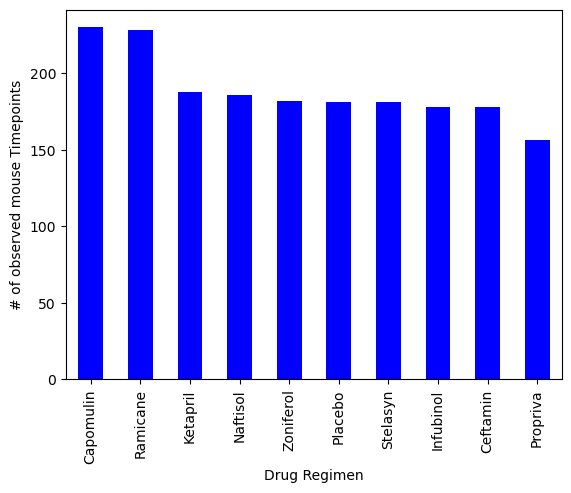

In [140]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count = clean_combined_file["Drug Regimen"].value_counts()
mice_count
plot_pandas = mice_count.plot.bar(color='b')  
# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("# of observed mouse Timepoints")


In [141]:
mice_count

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     156
Name: count, dtype: int64

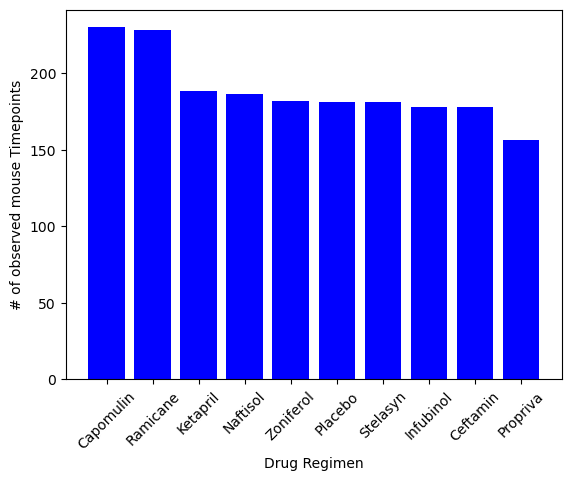

In [142]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x= mice_count.index
y= mice_count.values
plt.bar(x, y, color='b', align='center')
plt.xlabel("Drug Regimen")
plt.ylabel("# of observed mouse Timepoints")
plt.xticks(rotation=45)
plt.show()



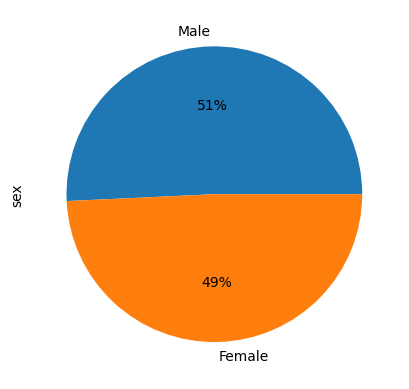

In [143]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
female_vs_male = clean_combined_file["Sex"].value_counts()
female_vs_male
#fig, ax = plt.subplots()
#ax.pie(female_vs_male, autopct='%1.1f%%') Error
female_vs_male.plot.pie(autopct="%1.0f%%")
plt.ylabel("sex")
plt.show()


In [144]:
female_vs_male

Sex
Male      958
Female    930
Name: count, dtype: int64

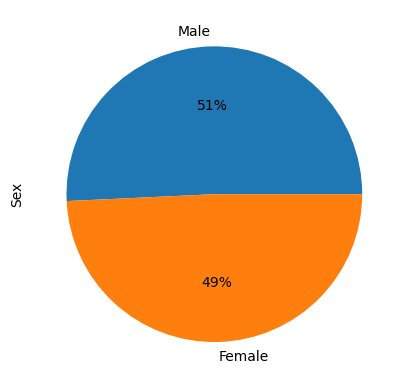

In [145]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
count = female_vs_male.values
count_labels = female_vs_male.index
plt.pie(count, labels= count_labels, autopct="%1.0f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [164]:
Capomulin_df = clean_combined_file.loc[clean_combined_file["Drug Regimen"] == "Capomulin",:]
Capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [188]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = clean_combined_file.loc[clean_combined_file["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_combined_file.loc[clean_combined_file["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_combined_file.loc[clean_combined_file["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_combined_file.loc[clean_combined_file["Drug Regimen"] == "Ceftamin", :]
new_df = pd.DataFrame({"Capomulin": Capomulin_df["Tumor Volume (mm3)"],
         "Ramicane": Ramicane_df["Tumor Volume (mm3)"],
          "Infubinol": Infubinol_df["Tumor Volume (mm3)"],
          "Ceftamin": Ceftamin_df["Tumor Volume (mm3)"]})

# Start by getting the last (greatest) timepoint for each mouse
last_tumor =clean_combined_file.groupby(['Mouse ID'])["Timepoint"].max().reset_index()
last_tumor
Last_tumor_size=last_tumor.rename(columns={'Timepoint': 'Max Timepoint'})
Last_tumor_size


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(clean_combined_file, Last_tumor_size, on=["Mouse ID"])
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2,45
1884,z969,Naftisol,Male,9,30,30,65.841013,3,45
1885,z969,Naftisol,Male,9,30,35,69.176246,4,45
1886,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [196]:
# Put treatments into a list for for loop (and later for plot labels)
# treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
treatment = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volume_data = []

for drug in treatment:
 drug_data = merged_df.loc[merged_df['Drug Regimen'] == drug]
 final_tumor_volume = drug_data.loc[drug_data['Timepoint'] == drug_data['Max Timepoint']]['Tumor Volume (mm3)']
 tumor_volume_data.append(final_tumor_volume)
    

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
upperq_list = []
lowerq_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i, drug in enumerate(treatment):   
    quartiles = tumor_volume_data[i].quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    drug_iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*drug_iqr)
    upper_bound = upperq + (1.5*drug_iqr)
    outliers = tumor_volume_data[i][(tumor_volume_data[i] < lower_bound) | (tumor_volume_data[i] > upper_bound)]
    
    print(f"{drug} Potential Outliers: {outliers}")
    
    
    #list containing upper and lower quartiles of drug final timor volume 
    upperq_list.append(upperq)
    lowerq_list.append(lowerq)
    print(f"iqr for {drug}: {drug_iqr}")
    
upperq_list   
lowerq_list
    
    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset 

    
    # Determine outliers using upper and lower bounds
#threshold = 1.5
#filter = (quartiles < lowerq - threshold * drug_iqr) | (quartiles > upperq + threshold * drug_iqr)
#filter- This code gives wrong value


Capomulin Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
iqr for Capomulin: 7.781863460000004
Ramicane Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
iqr for Ramicane: 9.098536719999998
Infubinol Potential Outliers: 669    36.321346
Name: Tumor Volume (mm3), dtype: float64
iqr for Infubinol: 11.477135160000003
Ceftamin Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
iqr for Ceftamin: 15.577752179999997


[32.37735684, 31.56046955, 54.04860769, 48.72207785]

In [200]:
final_volumes = []
for drug in treatments:
    # Locate the rows in the merged DataFrame that correspond to each drug
    drug_data = merged_df.loc[merged_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    # Append the resulting final tumor volumes for each drug to the empty list
    final_volumes.append(drug_data)

Text(0.5, 0, '')

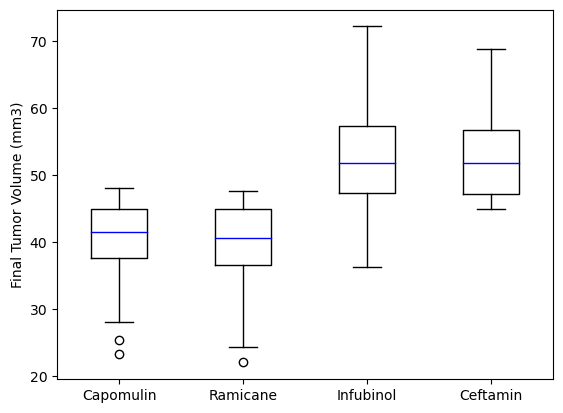

In [202]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot = new_df.boxplot(grid = False, color = dict(boxes = 'k', whiskers='k', medians='b'))
boxplot.set_ylabel('Final Tumor Volume (mm3)')
boxplot.set_xlabel('')

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

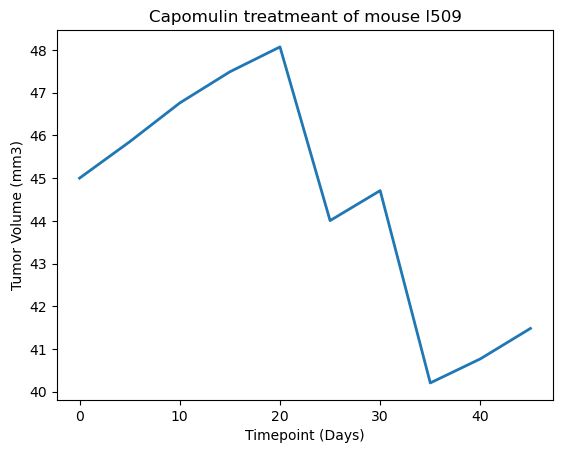

In [205]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
forline_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
forline_df.head()
x_axisTP = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axisTP, tumsiz,linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')


Text(0, 0.5, 'Average Tumor Volume (mm3)')

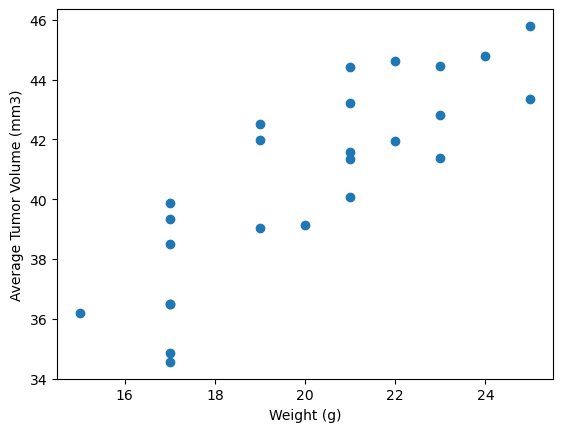

In [211]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capavg = Capomulin_df.groupby(['Mouse ID']).mean(numeric_only=True)
capavg
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


The correlation between mouse weight and average tumor volume is 0.84


Text(0, 0.5, 'Average Tumore Volume (mm3)')

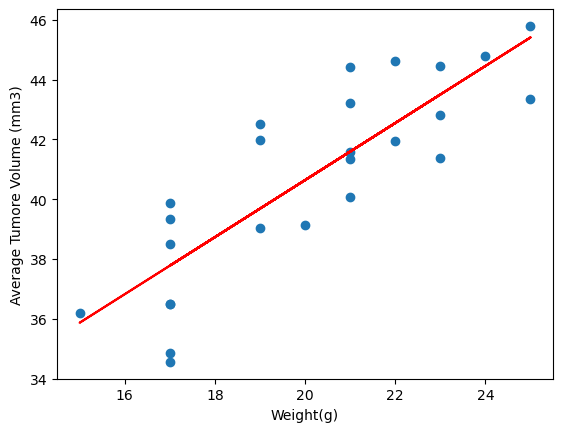

In [215]:
corr=round(st.pearsonr(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")
model=st.linregress(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
model
mslope = 0.9544396890241045
bintercept = 21.552160532685015
y_values = capavg['Weight (g)']*mslope+bintercept
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.plot(capavg['Weight (g)'],y_values,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')

